<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu7/Week_7_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 7: Clustering
# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# NO: 27

# Praktikum 1 KMeans

In [2]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/dataset/Minggu7/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


1. Impor library untuk pengolahan data dan visualisasi.  
2. Baca file `Iris.csv` dari Google Drive.  
3. Tampilkan 5 baris pertama dengan `df.head()`. Hasilnya menunjukkan detail panjang dan lebar sepal serta petal dari spesies `Iris-setosa`.

In [4]:
# Seleksi Fitur
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Menampilkan hasil seleksi fitur
print("Fitur yang dipilih:")
print(X.head())

Fitur yang dipilih:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


Program ini melakukan seleksi fitur dari dataset iris. Fitur yang dipilih adalah panjang dan lebar sepal serta panjang dan lebar petal. Hasil seleksi menunjukkan nilai-nilai untuk setiap fitur:

```
Fitur yang dipilih:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
```

Setiap baris mewakili data untuk spesies bunga `Iris-setosa`.

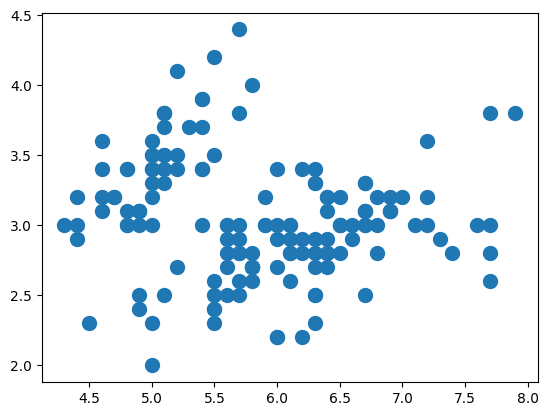

In [5]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

- `plt.scatter(...)`: Fungsi ini digunakan untuk membuat diagram sebar (scatter plot).
- `X.iloc[:, 0]`: Mengambil semua baris dari kolom pertama fitur (panjang sepal).
- `X.iloc[:, 1]`: Mengambil semua baris dari kolom kedua fitur (lebar sepal).
- `s = 100`: Menentukan ukuran titik pada diagram sebar menjadi 100.

Gambar yang dihasilkan menunjukkan sebaran data dari dua fitur: panjang sepal dan lebar sepal. Setiap titik mewakili satu data dari spesies `Iris-setosa`. Titik-titik tersebut tidak terdistribusi secara linier, sehingga mengindikasikan adanya variasi dalam ukuran sepal di antara bunga-bunga dalam dataset.

In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

1. **Impor KMeans**: Mengimpor kelas KMeans dari pustaka `sklearn.cluster`.
2. **Inisiasi KMeans**: `cl_kmeans = KMeans(n_clusters=2)` menginisialisasi objek KMeans dengan jumlah kluster (k) yang diinginkan yaitu 2.
3. **Fit dan Predict**: `y_kmeans = cl_kmeans.fit_predict(X)` melakukan proses pelatihan pada data `X` dan memprediksi kluster untuk setiap titik data. Hasilnya disimpan dalam `y_kmeans`, yang berisi label kluster untuk masing-masing data.


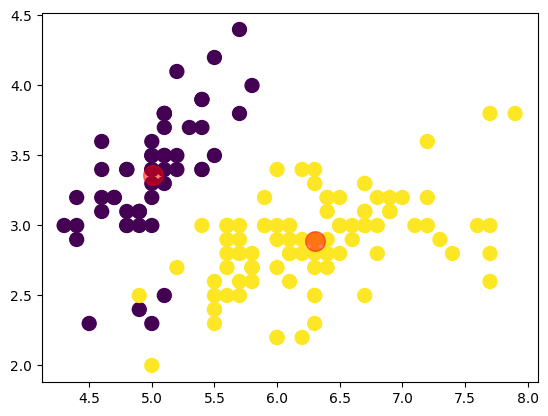

In [7]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Gambar di atas menunjukkan hasil clustering menggunakan KMeans pada dataset bunga iris, dengan dua fitur: panjang dan lebar sepal.

1. **Data Kluster**:
   - Titik-titik berwarna kuning dan ungu mewakili dua kluster yang dihasilkan oleh algoritma KMeans. Kluster ini menunjukkan pengelompokan data berdasarkan kesamaan panjang dan lebar sepal.

2. **Centroid Kluster**:
   - Titik merah besar menunjukkan centroid untuk masing-masing kluster. Centroid ini adalah titik tengah dari kluster, yang merepresentasikan rata-rata posisi dari semua titik dalam kluster tersebut.

Hasil visual ini membantu memahami bagaimana bunga iris dikelompokkan berdasarkan fitur yang dipilih.

In [8]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


- `cl_kmeans.inertia_`: Menghitung dan menyimpan nilai SSE, yang merupakan total jarak kuadrat antara setiap titik data dan centroid kluster terdekat.
- Nilai SSE yang lebih rendah menunjukkan bahwa kluster lebih padat dan lebih baik terpisah.

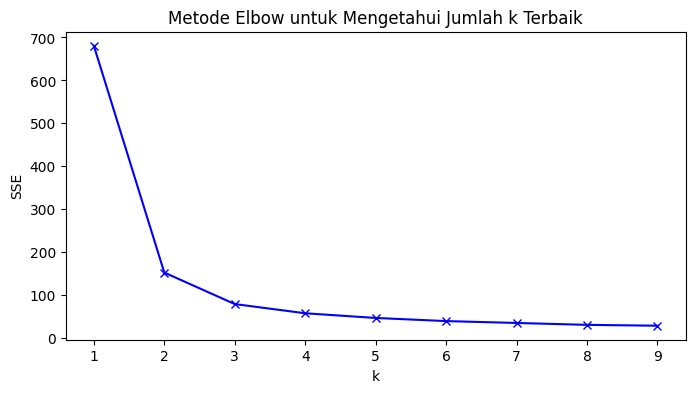

In [9]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Grafik di atas menunjukkan hasil penerapan metode Elbow untuk menentukan jumlah kluster (k) terbaik dalam analisis KMeans.

1. **Inisialisasi dan Penghitungan SSE**:
   - Nilai SSE dihitung untuk rentang k dari 1 hingga 9. Nilai ini disimpan dalam list `sse`.

2. **Plotting**:
   - Grafik menggambarkan hubungan antara nilai k (sumbu x) dan nilai SSE (sumbu y).
   - Setiap titik pada grafik menunjukkan nilai SSE untuk masing-masing k, dihubungkan dengan garis biru.

- **Grafik Elbow**:
  - Terlihat bahwa pada k=1, nilai SSE sangat tinggi (sekitar 700).
  - Nilai SSE menurun drastis ketika k=2, tetapi penurunan mulai melambat setelah k=3 hingga k=9.
  - Titik "elbow" terlihat antara k=2 dan k=3, menunjukkan bahwa jumlah kluster optimal untuk model KMeans ini kemungkinan adalah 2 atau 3, di mana penambahan jumlah kluster tidak memberikan pengurangan yang signifikan pada nilai SSE.

In [10]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=46.56163015873017
k=6; SSE=39.2778790000849
k=7; SSE=34.88779721460591
k=8; SSE=30.489160868519573
k=9; SSE=28.477563842308765


- **SSE (Sum of Squared Errors)**: Menunjukkan seberapa baik model KMeans dapat memisahkan data ke dalam kluster. Nilai SSE yang lebih rendah menunjukkan bahwa data lebih dekat ke centroid kluster, menandakan pemisahan yang lebih baik.
- **Tren Penurunan**: Dari hasil tersebut, terlihat bahwa nilai SSE menurun drastis dari k=1 ke k=2, yang menunjukkan bahwa menambahkan satu kluster dapat sangat meningkatkan pemisahan data.
- **Poin Elbow**: Setelah k=2, penurunan SSE semakin melambat, terutama setelah k=3. Ini mengindikasikan bahwa penambahan kluster lebih lanjut memberikan sedikit peningkatan dalam pemisahan data, sehingga k=2 atau k=3 dapat dianggap sebagai pilihan yang optimal untuk model.

# Praktikum 2 Konsep K-Means untuk klasterisasi data
import library

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

1. **`import matplotlib.pyplot as plt`**: Membuat visualisasi data seperti grafik dan diagram.
  
2. **`import seaborn as sns; sns.set()`**: Visualisasi statistik yang lebih menarik dan informatif. `sns.set()` mengatur gaya visualisasi agar lebih estetis.

3. **`import numpy as np`**: Operasi numerik dan manipulasi array

# Pengantar k-Means

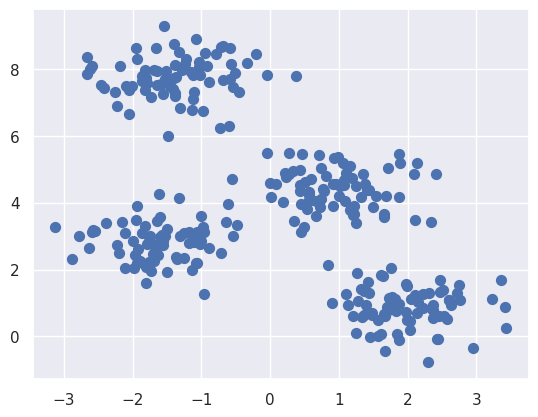

In [12]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

- `make_blobs` digunakan untuk membuat data sintetis dengan 4 pusat kluster yang memiliki standar deviasi masing-masing sebesar 0.60, yang menyebabkan titik-titik dalam setiap kluster agak rapat.
- `plt.scatter(X[:, 0], X[:, 1], s=50);` memplot koordinat data pada sumbu x dan y. Setiap titik mewakili satu sampel dari data yang dibangkitkan. Ukuran titik-titik ditentukan dengan parameter `s=50`.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

- `KMeans(n_clusters=4)` menginisialisasi model K-Means untuk 4 kluster.
- `kmeans.fit(X)` melatih model pada data `X` untuk mencari pusat kluster.
- `kmeans.predict(X)` memberikan label kluster untuk setiap titik data yang disimpan dalam `y_kmeans`.

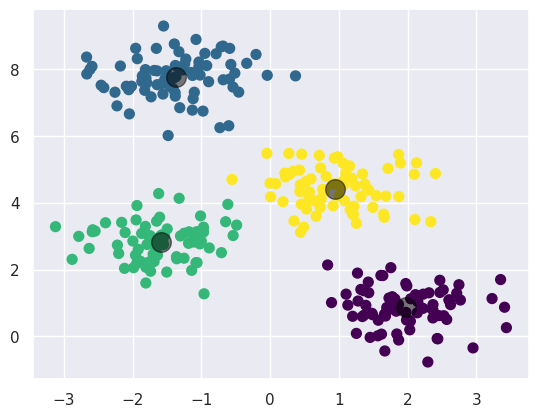

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

- **`plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')`**:
  - Menampilkan data `X` dengan warna yang berbeda untuk masing-masing kluster berdasarkan hasil prediksi `y_kmeans`.
  - `c=y_kmeans` memberi warna berbeda pada tiap kluster, dan `cmap='viridis'` menentukan skema warna.
  - `s=50` mengatur ukuran titik.

- **`centers = kmeans.cluster_centers_`**:
  - Mengambil posisi pusat kluster yang ditemukan oleh K-Means.

- **`plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)`**:
  - Memvisualisasikan pusat kluster dengan warna hitam (`c='black'`), ukuran besar (`s=200`), dan transparansi (`alpha=0.5`).

### Penjelasan gambar:
Pada gambar, Titik pusat kluster ditandai dengan warna hitam besar dan transparan, menunjukkan lokasi centroid dari setiap kluster yang ditemukan oleh algoritma K-Means. Hal ini memudahkan untuk memahami bagaimana data terdistribusi dalam empat kelompok dan di mana pusat setiap kluster berada.

# Algoritma Expectation-Maximization

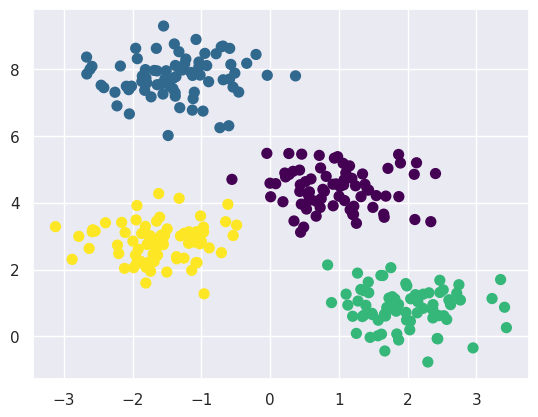

In [23]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

   - `rng.permutation(X.shape[0])[:n_clusters]` memilih secara acak `n_clusters` titik dari data `X` untuk digunakan sebagai pusat kluster awal (`centers`).
   - `pairwise_distances_argmin(X, centers)` menghitung jarak antara setiap titik data dan pusat kluster, kemudian mengalokasikan label ke titik data berdasarkan pusat kluster terdekat.
   - `new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])` memperbarui pusat kluster dengan mengambil rata-rata posisi titik dalam setiap kluster.
   - `plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')` memvisualisasikan hasil klasterisasi dengan warna berbeda berdasarkan label kluster yang dihasilkan.

### Penjelasan Gambar:
Pada gambar Setiap kluster ditandai dengan warna yang berbeda, dan posisi pusat kluster diperbarui hingga konvergen. Ini menunjukkan pembagian data yang jelas ke dalam 4 kluster, dengan tiap kluster memiliki warna yang konsisten.

# Perubahan random

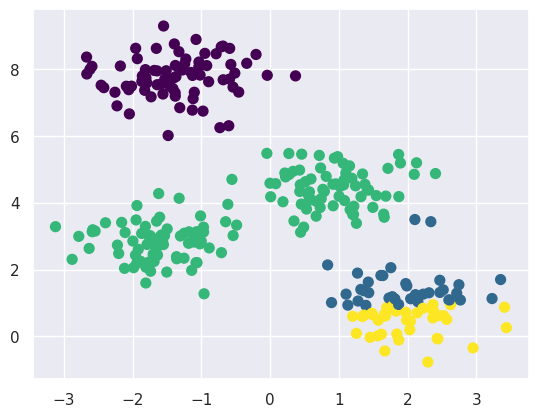

In [24]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- klasterisasi pada data `X` dengan 4 kluster menggunakan fungsi `find_clusters`. Hasilnya adalah pusat kluster (`centers`) dan label kluster (`labels`).
- **`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')`**:
  - Memvisualisasikan data dengan warna yang berbeda untuk setiap kluster.

# Optimalisasi Jumlah Klaster

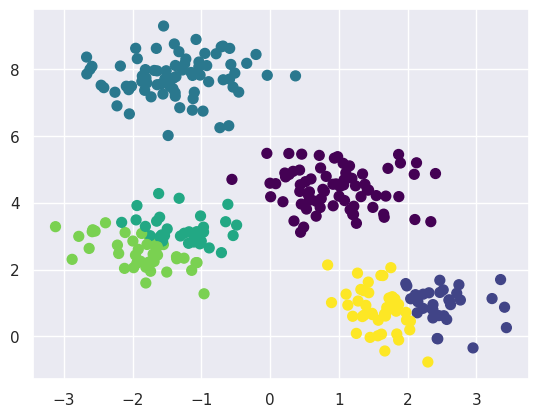

In [25]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- **`KMeans(6, random_state=0).fit_predict(X)`**:
  - Menggunakan K-Means dengan 6 kluster untuk memodelkan data `X`.
  - `fit_predict(X)` melatih model dan mengembalikan label kluster untuk setiap titik data.
- **`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')`**:
  - Memvisualisasikan data `X`, mewarnai titik berdasarkan label kluster yang dihasilkan.

# Batas Klaster yang Tidak Selalu Linier

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

- **`make_moons(200, noise=.05, random_state=0)`**:
  - Membuat 200 sampel data yang membentuk dua kluster berbentuk bulan sabit (moons).
  - **`noise=0.05`** menambahkan sedikit gangguan (noise) pada data agar lebih realistis, sehingga titik-titik data tidak terdistribusi sempurna.
  - **`random_state=0`** memastikan hasil yang konsisten setiap kali kode dijalankan.

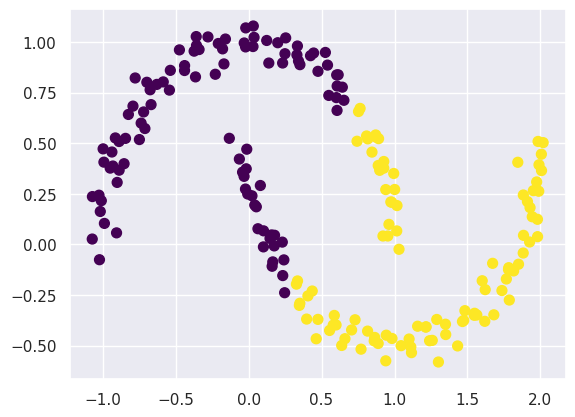

In [27]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- **`KMeans(2, random_state=0).fit_predict(X)`**:
  - Menetapkan K-Means untuk mencari 2 kluster pada data `X` (dua bulan sabit).
  - `fit_predict(X)` melatih model dan menghasilkan label kluster untuk setiap titik data.

- **`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')`**:
  - Memvisualisasikan hasil klasterisasi dengan warna yang berbeda untuk setiap kluster berdasarkan `labels`.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


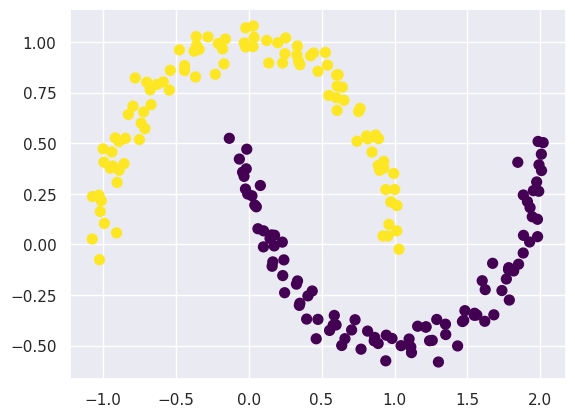

In [28]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- **`SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')`**:
  - **`n_clusters=2`**: Menentukan jumlah kluster yang diinginkan (2 kluster, sesuai dengan bentuk bulan sabit).
  - **`affinity='nearest_neighbors'`**: Menentukan cara menghitung kedekatan antar titik, menggunakan tetangga terdekat.
  - **`assign_labels='kmeans'`**: Menggunakan K-Means untuk menetapkan label kluster setelah matriks kedekatan dihitung.

- **`labels = model.fit_predict(X)`**:
  - Melatih model dan menghasilkan label kluster untuk setiap titik data.

- **`plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')`**:
  - Memvisualisasikan hasil klasterisasi dengan warna yang berbeda untuk tiap kluster.


# Contoh Kasus 1: Karakter Angka

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Hasil output **(1797, 64)** menunjukkan bahwa dataset **digits** memiliki 1797 gambar, dan setiap gambar direpresentasikan dengan 64 fitur, yang berasal dari 8x8 piksel gambar. Jadi, ada 1797 sampel (gambar), dan masing-masing gambar terdiri dari 64 nilai fitur (setiap nilai mewakili intensitas piksel pada gambar 8x8).

In [30]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Hasil output **(10, 64)** menunjukkan bahwa **K-Means** telah menemukan 10 kluster, masing-masing dengan 64 fitur. Ini berarti untuk setiap kluster (yang mewakili angka 0-9), K-Means menghasilkan satu **pusat kluster** yang berukuran 64, yang merepresentasikan rata-rata dari 64 piksel pada gambar 8x8 untuk setiap kluster.

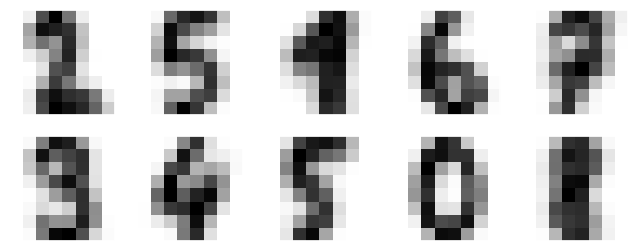

In [31]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

- **`centers = kmeans.cluster_centers_.reshape(10, 8, 8)`**:
  - Mengubah dimensi pusat kluster yang awalnya (10, 64) menjadi (10, 8, 8), sehingga setiap pusat kluster dapat ditampilkan sebagai gambar 8x8 piksel.

- **`for axi, center in zip(ax.flat, centers):`**:
  - Melakukan iterasi melalui tiap pusat kluster (10 kluster) dan menampilkan tiap pusat dalam subplot.

- **`axi.set(xticks=[], yticks=[])`**:
  - Menghapus tanda pada sumbu X dan Y agar gambar lebih jelas tanpa gangguan.

- **`axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)`**:
  - Menampilkan pusat kluster sebagai gambar dengan skala warna hitam-putih (`binary`), menggunakan interpolasi terdekat.

In [32]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

1. **`labels = np.zeros_like(clusters)`**:
   - Membuat array kosong `labels` dengan ukuran yang sama dengan array `clusters`. Array ini akan digunakan untuk menyimpan label yang lebih sesuai.

2. **`for i in range(10):`**:
   - Melakukan iterasi untuk setiap kluster (dari 0 hingga 9).

3. **`mask = (clusters == i)`**:
   - Membuat masker boolean yang memilih data dengan label kluster `i`.

4. **`labels[mask] = mode(digits.target[mask])[0]`**:
   - Menggunakan **`scipy.stats.mode`** untuk menemukan label target yang paling sering muncul (modus) dalam kluster tersebut. Ini menggantikan label kluster dengan angka yang sesuai.
   - **`mode(digits.target[mask])[0]`** mengambil modus dari label target yang sesuai dengan kluster `i`.

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Hasil output **0.744** menunjukkan bahwa **akurasi** dari klasterisasi **K-Means** pada dataset **digits** adalah sekitar **74.4%**. Artinya, sekitar 74.4% dari label yang diprediksi oleh K-Means sesuai dengan label yang sebenarnya (angka 0-9).

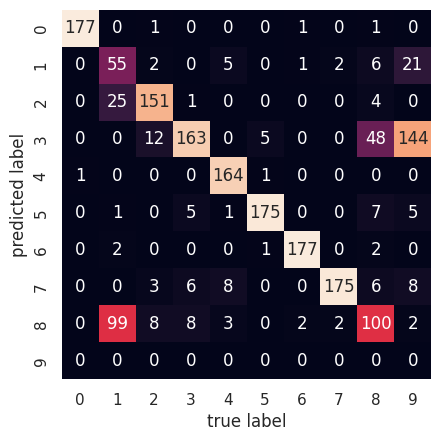

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

1. **`mat = confusion_matrix(digits.target, labels)`**:
   - Menghitung **confusion matrix** antara label sebenarnya (`digits.target`) dan label yang diprediksi oleh K-Means (`labels`).
   - Confusion matrix ini menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas (angka 0-9).

2. **`sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)`**:
   - **`sns.heatmap`** digunakan untuk memvisualisasikan confusion matrix sebagai heatmap.
   - **`.T`** mentranspose confusion matrix, agar label yang benar berada di sumbu X dan label yang diprediksi berada di sumbu Y.
   - **`annot=True`** menambahkan angka di dalam sel heatmap.
   - **`fmt='d'`** format angka sebagai integer.
   - **`xticklabels=digits.target_names` dan `yticklabels=digits.target_names`** menampilkan nama angka (0-9) pada sumbu X dan Y.

3. **`plt.xlabel('true label')`** dan **`plt.ylabel('predicted label')`**:
   - Menambahkan label pada sumbu X dan Y untuk menggambarkan bahwa sumbu X adalah label yang benar dan sumbu Y adalah label yang diprediksi.

In [36]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

Hasil output **0.942** menunjukkan bahwa **akurasi** dari klasterisasi K-Means pada data yang telah diproyeksikan menggunakan **t-SNE** adalah sekitar **94.2%**. Ini adalah peningkatan yang signifikan dibandingkan dengan akurasi sebelumnya.

# Studi Kasus 2: Kompresi Citra

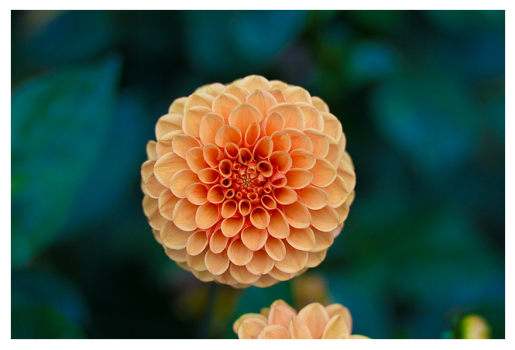

In [38]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

1. **`flower = load_sample_image("flower.jpg")`**: Memuat gambar bunga sebagai array.
2. **`ax = plt.axes(xticks=[], yticks=[])`**: Menghapus sumbu X dan Y.
3. **`ax.imshow(flower)`**: Menampilkan gambar bunga.

In [39]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Hasil output **(273280, 3)** menunjukkan bahwa gambar **flower** sekarang direpresentasikan sebagai array 2D dengan **273,280 piksel**, masing-masing dengan 3 nilai warna (RGB). Setiap baris dalam array ini berisi satu piksel dengan informasi warna untuk merah, hijau, dan biru.

In [40]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

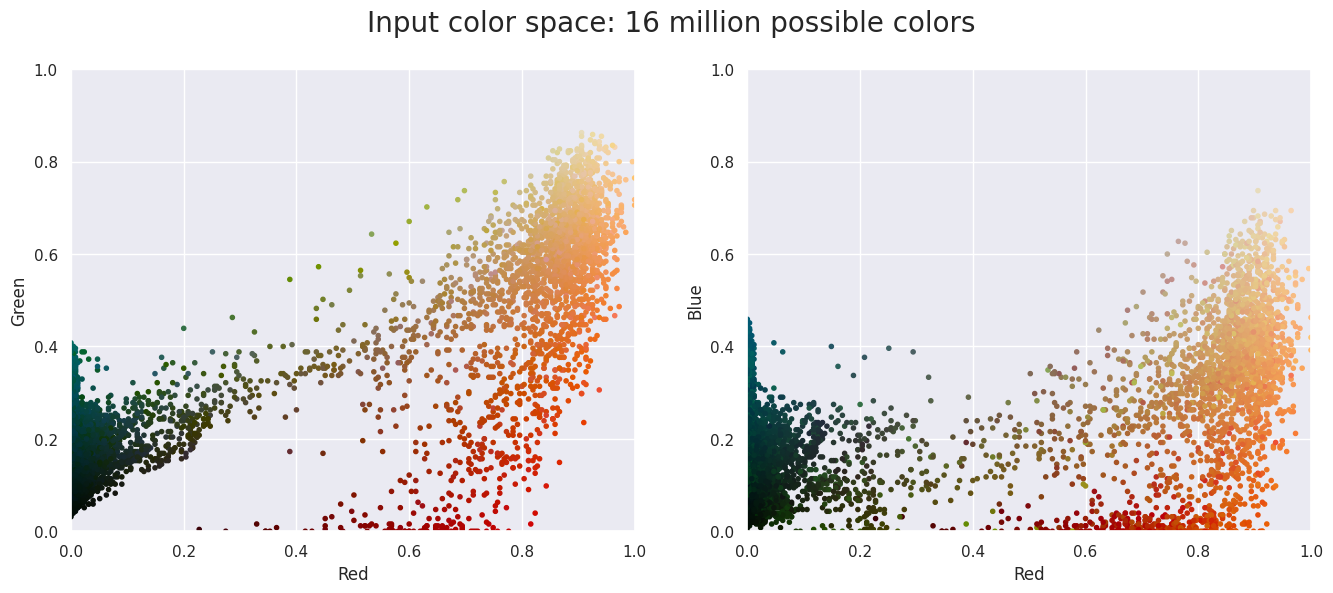

In [41]:
plot_pixels(data, title='Input color space: 16 million possible colors')

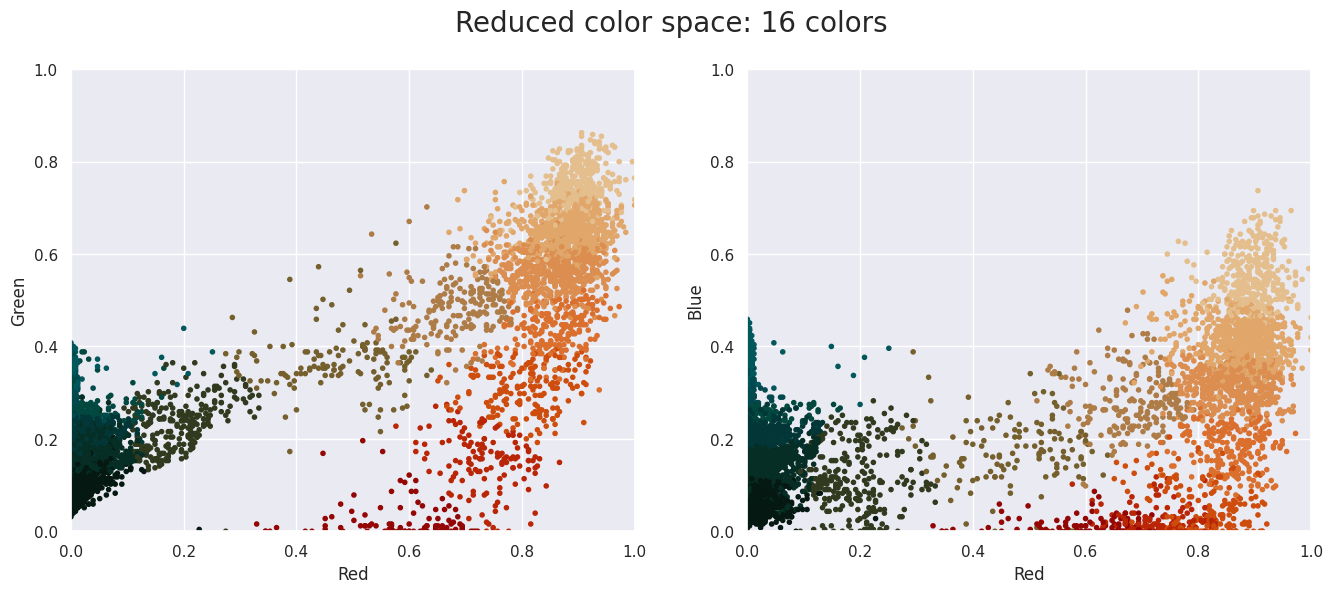

In [42]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

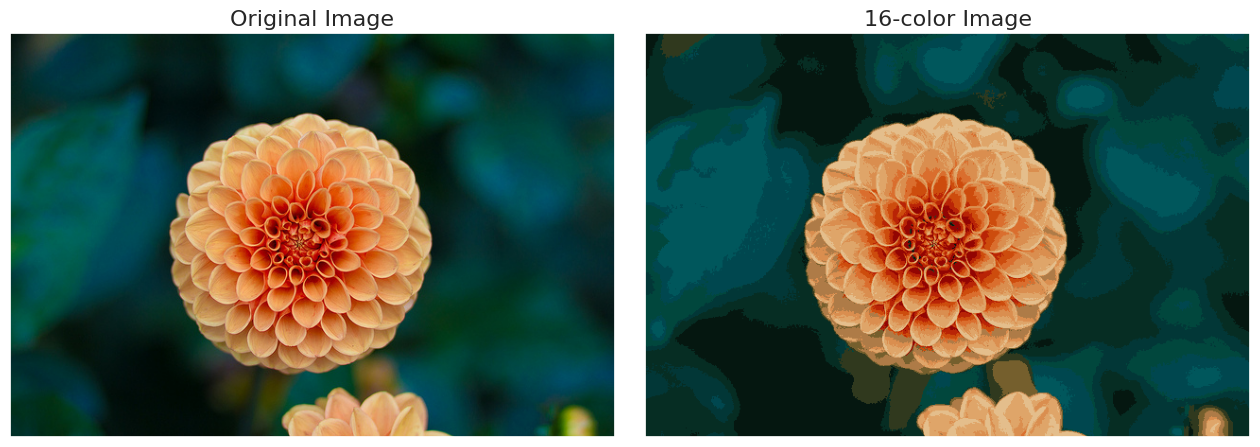

In [43]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3 Self-optimizing Map (SOM)
instalasi minisom

In [46]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=46d4822193d5a7fae9b5ba92fb09bace7f76c412e7f0f8ed838987d9ff84278a
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [47]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [48]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [49]:
# Normalisasi data
data = data / data.max(axis=0)

In [50]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [51]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [52]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

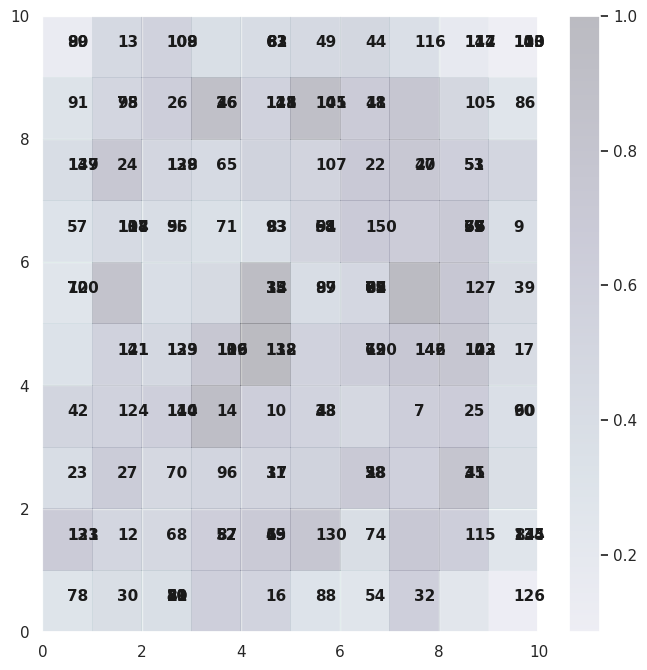

In [53]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

# Praktikum 4 Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

instalasi minisom

In [54]:
pip install minisom

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [56]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [57]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [58]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [59]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [60]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [61]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "/content/drive/MyDrive/dataset/Minggu7/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [63]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

KeyboardInterrupt: 

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()